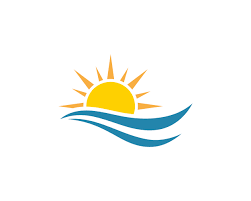

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('weather_data.csv')
df=data.copy()

In [3]:
df.head()

,Date,Temperature,Average humidity (%,Average dewpoint (°F,Average barometer (in,Average windspeed (mph,Average gustspeed (mph,Average direction (°deg,Rainfall for month (in,Rainfall for year (in,Maximum rain per minute,Maximum temperature (°F,Minimum temperature (°F,Maximum humidity (%,Minimum humidity (%,Maximum pressure,Minimum pressure,Maximum windspeed (mph,Maximum gust speed (mph,Maximum heat index (°F,Date1,Month,diff_pressure
0,01/01/2022,'37.8','35.0','12.7','29.7','26.4','36.8','274.0','0.0','0.0','0.0','40.0','34.0','4.0','27.0','29.762','29.596','41.4','59.0','40.0','2022-01-01','01','0.16600000000000037'
1,2022-01-02','43.2','32.0','14.7','29.5','12.8','18.0','240.0','0.0','0.0','0.0','52.0','37.0','4.0','16.0','29.669','29.268','35.7','51.0','52.0','2022-01-02','01','0.4009999999999998'
2,2022-01-03','25.7','60.0','12.7','29.7','8.3','12.2','290.0','0.0','0.0','0.0','41.0','6.0','8.0','35.0','30.232','29.26','25.3','38.0','41.0','2022-01-03','01','0.9719999999999978'
3,2022-01-04','9.3','67.0','0.1','30.4','2.9','4.5','47.0','0.0','0.0','0.0','19.0','-0.0','7.0','35.0','30.566','30.227','12.7','20.0','32.0','2022-01-04','01','0.33899999999999864'
4,2022-01-05','23.5','30.0','-5.3','29.9','16.7','23.1','265.0','0.0','0.0','0.0','30.0','15.0','5.0','13.0','30.233','29.568','38.0','53.0','32.0','2022-01-05','01','0.6649999999999991'


### The weather data is recorded from 2022 till 2033.

### Data pre-processing

#### As you can see in the dataframe, We have inconsistent dates, labels, duplicate columns and all columns need to be assigned proper data type.

#### Rename and drop duplicate columns

In [4]:
df=df.drop(['Date1'], axis=1)

In [5]:
df.columns=['date','temperature','avg_humidity','avg_dewpoint','avg_barometer',
            'avg_windspeed','avg_gustspeed','avg_direction','monthly_rainfall',
            'yearly_rainfall','rain_per_minute_max','temperature_max','temperature_min','humidity_max',
            'humidity_min','pressure_max','pressure_min','windspeed_max','gust_speed_max',
            'heat_index_max','month','diff_pressure']

#### Our dataset contains  " ' " in every row, Replacing the " ' "  and  check for another symbols

In [6]:
symbol_pattern = r'[;:"/\\]'
has_symbols = df.apply(lambda x: x.str.contains(symbol_pattern).any())
print(has_symbols)

date                    True
temperature            False
avg_humidity           False
avg_dewpoint           False
avg_barometer          False
avg_windspeed          False
avg_gustspeed          False
avg_direction          False
monthly_rainfall       False
yearly_rainfall        False
rain_per_minute_max    False
temperature_max        False
temperature_min        False
humidity_max           False
humidity_min           False
pressure_max           False
pressure_min           False
windspeed_max          False
gust_speed_max         False
heat_index_max         False
month                  False
diff_pressure           True
dtype: bool


In [7]:
df = df.replace({"'": '', ";": ''}, regex=True)

#### Drop duplicates

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

#### data types

In [10]:
df.dtypes

date                   object
temperature            object
avg_humidity           object
avg_dewpoint           object
avg_barometer          object
avg_windspeed          object
avg_gustspeed          object
avg_direction          object
monthly_rainfall       object
yearly_rainfall        object
rain_per_minute_max    object
temperature_max        object
temperature_min        object
humidity_max           object
humidity_min           object
pressure_max           object
pressure_min           object
windspeed_max          object
gust_speed_max         object
heat_index_max         object
month                  object
diff_pressure          object
dtype: object

#### Change data types

In [11]:
df['date'] = pd.to_datetime(df['date'],errors='ignore')

In [12]:
df.columns

Index(['date', 'temperature', 'avg_humidity', 'avg_dewpoint', 'avg_barometer',
       'avg_windspeed', 'avg_gustspeed', 'avg_direction', 'monthly_rainfall',
       'yearly_rainfall', 'rain_per_minute_max', 'temperature_max',
       'temperature_min', 'humidity_max', 'humidity_min', 'pressure_max',
       'pressure_min', 'windspeed_max', 'gust_speed_max', 'heat_index_max',
       'month', 'diff_pressure'],
      dtype='object')

In [13]:
dtype_dict = {'temperature':'float', 'avg_humidity':'float', 'avg_dewpoint':'float', 'avg_barometer':'float',
       'avg_windspeed':'float', 'avg_gustspeed':'float', 'avg_direction':'float', 'monthly_rainfall':'float',
       'yearly_rainfall':'float', 'rain_per_minute_max':'float', 'temperature_max':'float',
       'temperature_min':'float', 'humidity_max':'float', 'humidity_min':'float', 'pressure_max':'float',
       'pressure_min':'float', 'windspeed_max':'float', 'gust_speed_max':'float', 'heat_index_max':'float',
       'month':'int', 'diff_pressure':'float'}
df = df.astype(dtype_dict)

In [14]:
min_date = df['date'].min()
max_date = df['date'].max()
print ("Min Date",min_date,"|","Max Date",max_date)

Min Date 01/01/2022 | Max Date 2022-12-31


#### Lets investigate if there is 29th February in date column

In [15]:
df['date2'] = pd.to_datetime(df['date'], errors = 'coerce')

In [16]:
df[df['date2'].isna()]['date']

2366    2022-02-29
3751    2022-02-29
Name: date, dtype: object

In [18]:
df.drop('date2',axis=1,inplace=True)

### Drop rows that contain 29th february date

In [19]:
df.drop(index=[2366, 3751],inplace=True)

In [20]:
df = df.reset_index(drop=True)

In [21]:
df['date']=pd.to_datetime(df['date'])

In [22]:
df.dtypes

date                   datetime64[ns]
temperature                   float64
avg_humidity                  float64
avg_dewpoint                  float64
avg_barometer                 float64
avg_windspeed                 float64
avg_gustspeed                 float64
avg_direction                 float64
monthly_rainfall              float64
yearly_rainfall               float64
rain_per_minute_max           float64
temperature_max               float64
temperature_min               float64
humidity_max                  float64
humidity_min                  float64
pressure_max                  float64
pressure_min                  float64
windspeed_max                 float64
gust_speed_max                float64
heat_index_max                float64
month                           int32
diff_pressure                 float64
dtype: object

#### This data should contain day wise weather attributes from 2022 to July 2033 (predicted data), We have to correct the years, because in the provided dataset the date column have same year 2022 in every row.

In [23]:
from datetime import datetime, timedelta

#### We can increment a new year everytime january month starts and add the same year in the subsequent rows as well.

In [24]:
current_year = df.loc[0, 'date'].year
previous_month = df.loc[0, 'date'].month

# loop through each row in the DataFrame
for i, row in df.iterrows():
    # check if the month is January
    if row['date'].month == 1 and previous_month != 1:
        # increment the current year by 1
        current_year += 1
    # update the Date column with the current date and year
    df.loc[i, 'date'] = row['date'].replace(year=current_year)
    # update the previous month variable
    previous_month = row['date'].month

In [25]:
min_date = df['date'].min()
max_date = df['date'].max()
print ("Min Date",min_date,"|","Max Date",max_date)

Min Date 2022-01-01 00:00:00 | Max Date 2033-07-28 00:00:00


In [26]:
df.head()

,date,temperature,avg_humidity,avg_dewpoint,avg_barometer,avg_windspeed,avg_gustspeed,avg_direction,monthly_rainfall,yearly_rainfall,rain_per_minute_max,temperature_max,temperature_min,humidity_max,humidity_min,pressure_max,pressure_min,windspeed_max,gust_speed_max,heat_index_max,month,diff_pressure
0,2022-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,0.0,40.0,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,1,0.166
1,2022-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,0.0,52.0,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,1,0.401
2,2022-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,0.0,41.0,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,1,0.972
3,2022-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,0.0,19.0,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,1,0.339
4,2022-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,0.0,30.0,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,1,0.665


#### Plot temperature over the date

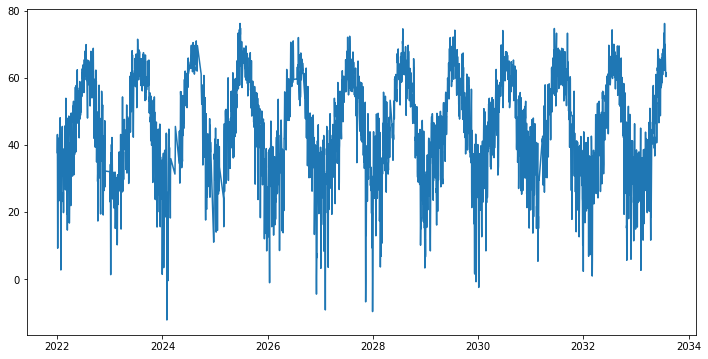

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature'])

# show the plot
plt.show()

In [28]:
df.to_csv('weather_data_cleaned.csv', index=False)